<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>


В этой домашке вы напишите свой класс логистической регрессии для многоклассовой классификации, а также логистическую регрессию с регуляризацией.

In [32]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [33]:
np.random.seed(42)

### 1. Градиентный спуск: повторение

Рассмотрим функцию от двух переменных:

In [34]:
def f(x):
  """
  :param x: np.array(np.float) вектор длины 2
  :return: np.float
  """
  return np.sum(np.sin(x)**2, axis=0)

Обратите внимание, что $x$ - numpy-array вектор длины 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинному обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $x_1$ и $x_2$ такие, что при них значение $f(x_1,x_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**. 

Реализуем функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

In [35]:
def grad_f(x): 
  """
  Градиент функциии f, определенной выше.
  :param x: np.array(np.float) вектор длины 2
  :return: np.array(np.float) вектор длины 2
  """
  return np.sin(2 * x)

In [36]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: градиент функции f (вектор длины 2)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array пар вида (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)
    
    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []
    
    # итерация цикла -- шаг градиентнго спуска
    curr_x = x0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
        curr_x -= lr * grad_f(curr_x)

    return np.vstack(history)

In [37]:
steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $x_1, x_2, f(x_1, x_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму.

(Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_x_1, cur\_x_2, f(cur\_x_1, cur\_x_2)$ в `steps` в процессе спуска)

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точку минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

/home/leon/Projects/Programming/Study/Python/ML_Study/Linear Models/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  del sys.path[0]


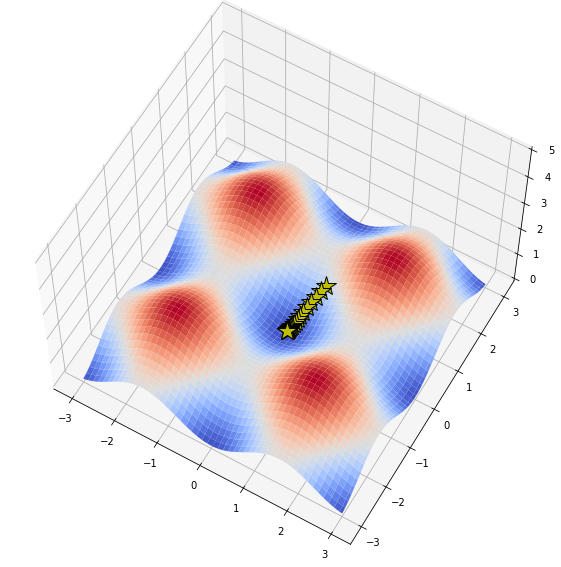

In [38]:
# %matplotlib osx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, f([X, Y]), cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=20, zorder=3, 
        markerfacecolor='y', lw=3, c='black')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

Посмотрим на график значений функции от шага

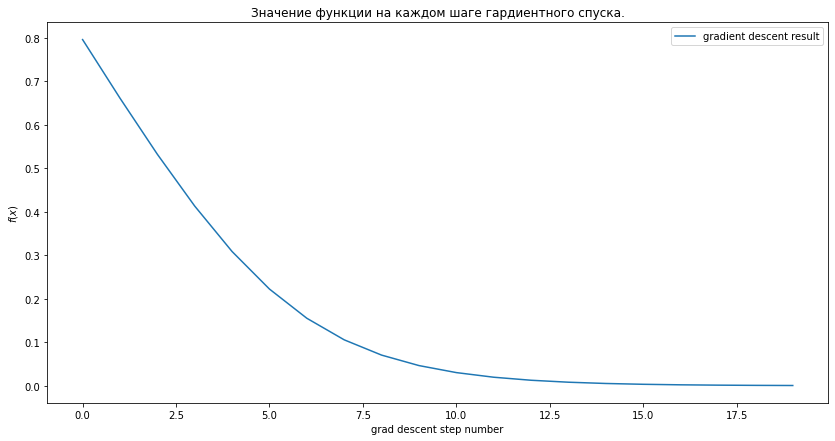

In [39]:
plt.figure(figsize=(14,7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге гардиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()

Когда вы используете градиентный спуск всегда нужно проверять, сошелся ли он. К сожалению для большинства моделей не получится построить 3D график, поэтому обязательно нужно смотреть на то, как менялся лосс на каждом шаге градиентного спуска.

# 2. Генератор батчей

Обычно генерация батчей отличается от той, которую мы использовали в семинаре. Мы выбирали *batch_size* случайных строчек на каждом шаге, но у такого подхода есть минусы. Основной заключается в том, что некоторые строчки из обучающего датасета могут попадаться значительно реже, чем другие. 

Чтобы это исправить обучение делят на эпохи. Мы хотим, чтобы в течение одной эпохи модель обучилась на каждом примере один раз. Для этого нужно перемешать строчки в датасете и каждый раз брать очередные *batch_size* строчек. 

Может так получится, что размер датасета не делится на *batch_size*, тогда последний батч будет состоять из нескольких последних строк и его размер будет меньше, чем *batch_size*. Такой батч иногда выкидывают и просто не используют. Именно так вам нужно поступить в этом задании.

Напишите генератор батчей, который будет принимать на вход признаки, ответы и размер батча. Генератор должен возвращать tuple из ($X_{batch}$, $y_{batch}$). Если размер датасета не делится на batch_size, то последний маленький батч возвращать не нужно. 

Подробнее про Python генераторы можно прочитать здесь:

[Документация](https://wiki.python.org/moin/Generators)

[Описание на русском](https://pythoner.name/list-generator)

Чтобы не перемешивать сам датасет воспользуйтесь np.random.permutation(len(X))


In [40]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
    for i in range(len(X) // batch_size):
        yield (X[perm[i * batch_size: (i + 1) * batch_size]], y[perm[i * batch_size: (i + 1) * batch_size]])


Проверим, что наш генератор батчей перемешивает датасет и каждый элемент встречается один раз:

In [41]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

X_reconstructed, y_reconstructed = [], []
for X_batch, y_batch in generate_batches(X_fake, y_fake, 10):
    X_reconstructed.append(X_batch)
    y_reconstructed.append(y_batch)

X_reconstructed = np.concatenate(X_reconstructed)
y_reconstructed = np.concatenate(y_reconstructed)

assert (X_fake != X_reconstructed).all()
assert (y_fake != y_reconstructed).all()

assert (np.sort(X_reconstructed, axis=0) == X_fake).all

Попробуем теперь *batch_size* не делящий размер датасета.

In [42]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

num_batches = 0
for X_batch, y_batch in generate_batches(X_fake, y_fake, 7):
    num_batches += 1

assert num_batches == len(X_fake) // 7

# 3. Логистическая регрессия с $l_1$ и $l_2$ регуляризацией. (elastic net)

Ваша задача -- написать класс логистической регрессии с обеими регуляризациями и оптимизацией с помощью SGD, используя генератор батчей, который вы написали выше.


In [51]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

class MyElasticLogisticRegression(object):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.w = None
    
    def fit(self, X, y, epochs=10, lr=0.1, batch_size=100):
        n, k = X.shape        
        if self.w is None:
            np.random.seed(42)
            self.w = np.random.randn(k + 1)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        # Положите в лист losses лосс на каждом батче. Не нужно усреднять лосс по эпохе.
        losses = []
        #### YOUR CODE (train loop here, use self.get_grad)####
        for _ in range(epochs):
            for X_batch, y_batch in generate_batches(X_train, y, batch_size):
                y_pred = sigmoid(logit(X_batch, self.w))
                losses.append(self.__loss(y_batch, y_pred))
                self.w -= lr * self.get_grad(X_batch, y_batch, y_pred)
        return losses
    
    def get_grad(self, X_batch, y_batch, predictions):
        """
        Принимает на вход X_batch с уже добавленной колонкой единиц. 
        НЕ НУЖНО РЕГУЛЯРИЗИРОВАТЬ BIAS.
        """
        w = np.copy(self.w)
        w[0] = 0
        print("+++++++++++", predictions.shape, (predictions - y_batch).shape)
        grad = X_batch.T @ (predictions - y_batch)
        l1_reg = self.l1_coef * np.sign(w)
        l2_reg = 2 * self.l2_coef * w
        return grad / len(y_batch) + l1_reg + l2_reg
        
    def predict_proba(self, X):
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self.w
      
    def __loss(self, y, p):  
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

Протестируем на искусственных данных:


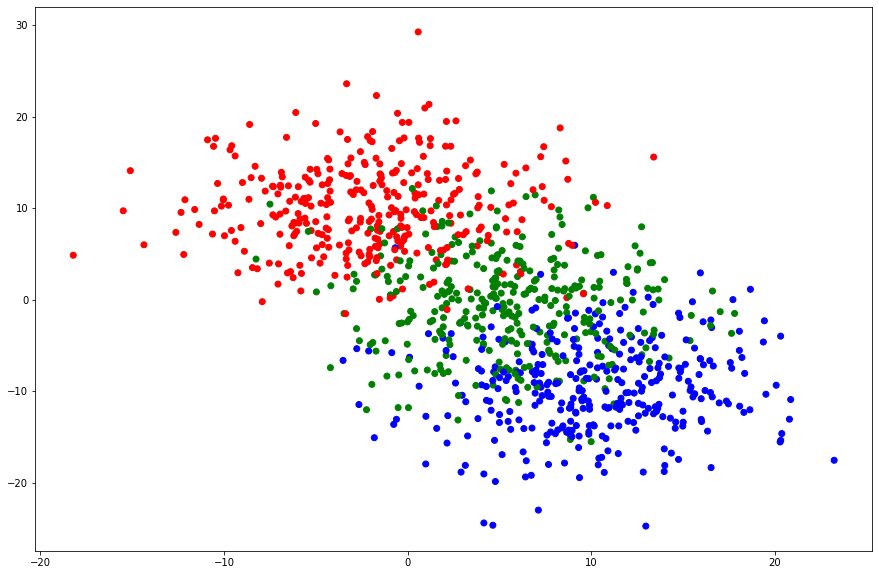

In [52]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2, 10],[5,-1], [10,-10]], cluster_std=5, random_state=42)

colors = ("red", "green", "blue")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1,2]):
    colored_y[y == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [53]:
clf = MyElasticLogisticRegression(0.1, 0.1)
clf.fit(X, y, epochs=1000)
w = clf.get_weights()
w

test = np.array([[20, -20], [20, -20]])
clf.predict(test)

+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ (100,) (100,)
+++++++++++ 

array([ True,  True])

In [46]:
from Logistic_Regression import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y[:, np.newaxis], 3)
lr.train(lr=0.01, iter=10, L1=0.0, L2=0.0)

lr.weights

  0%|          | 0/10 [00:00<?, ?it/s]


IndexError: invalid index to scalar variable.

In [ ]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
np.c_[xx.ravel(), yy.ravel()]

In [ ]:
clf.predict(np.array([[2, 0]]))

Теперь протестируем на датасете MNIST. Это очень простой класический датасет, на котором часто тестируются модели. С помощью нейронных сетей люди научились получать на нем качество 99.84%. 

Датасет состоит из черно-белых картинок с цифрами. ![mnist-3.0.1.png](https://www.researchgate.net/profile/Steven_Young11/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Так как мы сделали классификатор для двух классов, то мы выберем из всех картинок только картинки 0 и 1, првратим их из двумерной матрицы в вектор и обучим нашу модель.

In [ ]:
data = pd.read_csv('./train.csv')
data.head()

Данные выглядят как таблица, первая колонка которой это лейбел -- цифра, которая изображена на картинке, а следующие 784 колонки это значения от 0 до 255, описывающие все пиксели картинки 28х28. То есть нам не придется делать reshape и превращать матрицу в вектор, так как это уже сделано.

In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Выберем только картинки, где изображен 0 и 1
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

In [ ]:
y

Для оценки модели мы используем кросс валидацию.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# Сделайте sklearn pipeline с StandarScaler и MyElasticLogisticRegression и проверьте точность с помощью cross_val_score.
# в качестве scorer используйте 'accuracy'. Эта часть не проверяется в степике.
cls = make_pipeline(
    StandardScaler(),
    MyElasticLogisticRegression(.1, .1)
)
scorer = cross_val_score(cls, X, y, scoring='accuracy')
mean_accuracy = scorer.mean()
print(f"Mean accuracy of Logistic Regression for two classes is {mean_accuracy}")
scorer

In [ ]:
mcls = MyElasticLogisticRegression(.1, .1)
mcls.fit(X[:1000], y[:1000], epochs=1000)
w = mcls.get_weights()
w

In [ ]:
y[:1], y[3:4]

In [ ]:
mcls.predict(X[3:4])